Leaving duration at setup: 0.5 s.

******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     9828
Number of nonzeros in inequality constraint Jacobian.:     4221
Number of nonzeros in Lagrangian Hessian.............:     3203

Total number of variables............................:     3618
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bou

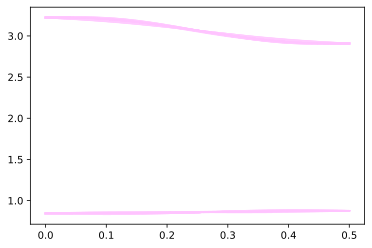

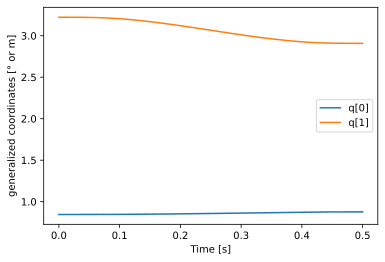

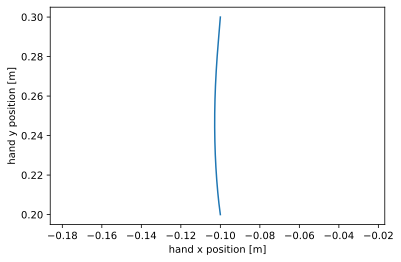

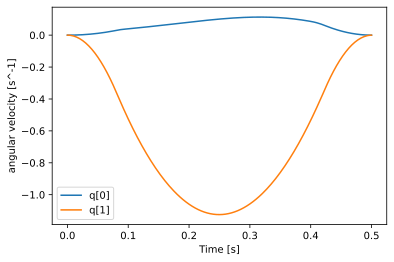

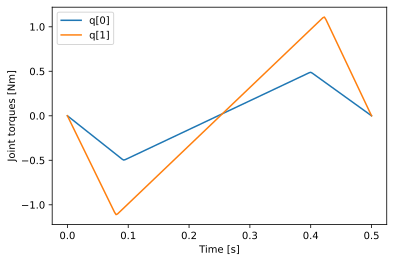

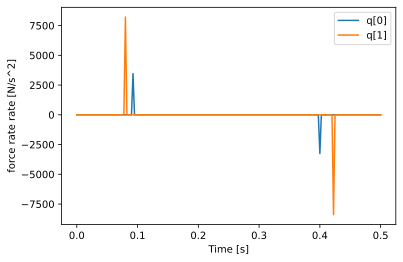

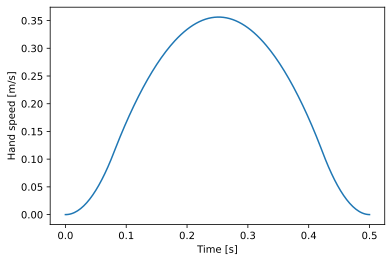

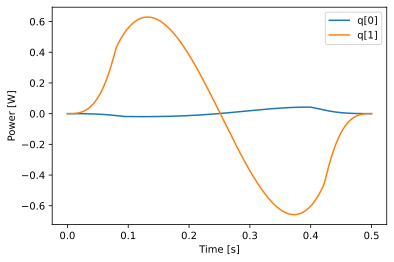

Leaving duration at setup: 0.5 s.
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     9828
Number of nonzeros in inequality constraint Jacobian.:     4221
Number of nonzeros in Lagrangian Hessian.............:     3203

Total number of variables............................:     3618
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     2028
Total number of inequality constraints...............:     2412
        inequality constraints with only lower bounds:      804
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:     1608

iter    objective    inf_pr   inf_du lg(mu)  ||d||  l

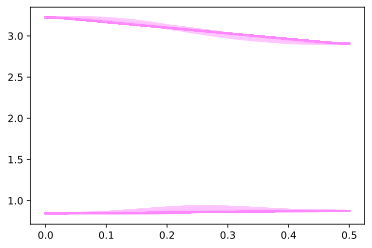

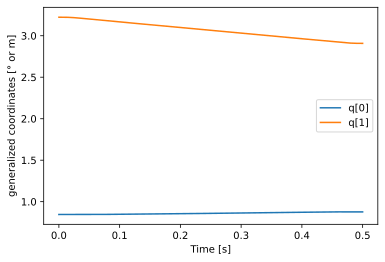

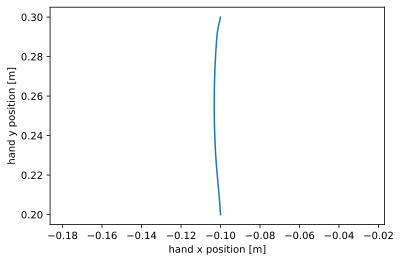

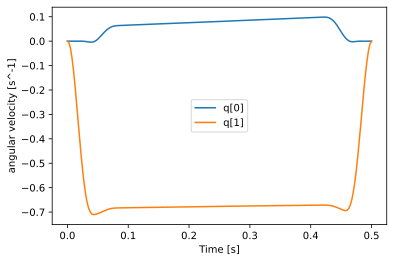

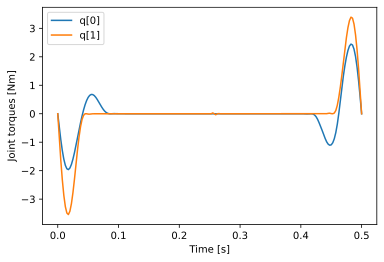

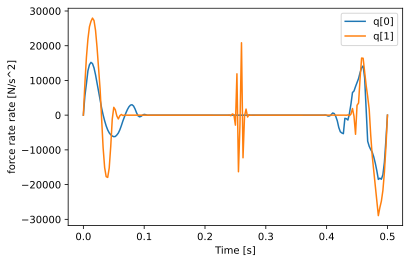

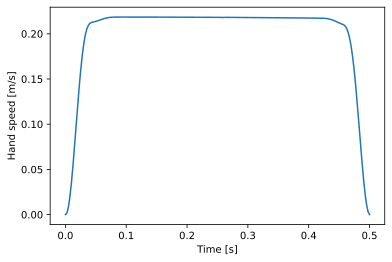

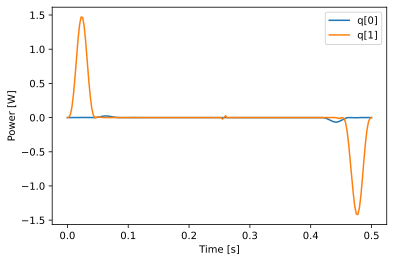

Leaving duration at setup: 0.5 s.
This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:     9828
Number of nonzeros in inequality constraint Jacobian.:     4221
Number of nonzeros in Lagrangian Hessian.............:     3203

Total number of variables............................:     3618
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     2028
Total number of inequality constraints...............:     2412
        inequality constraints with only lower bounds:      804
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:     1608

iter    objective    inf_pr   inf_du lg(mu)  ||d||  l

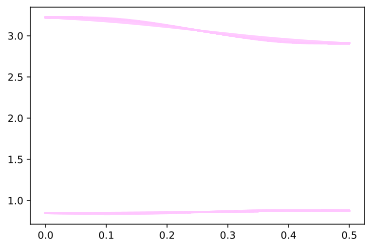

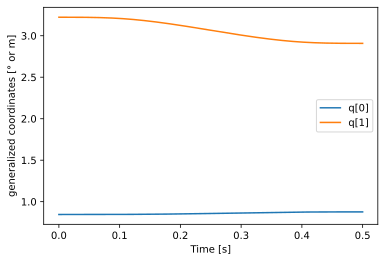

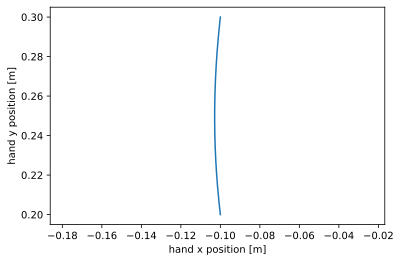

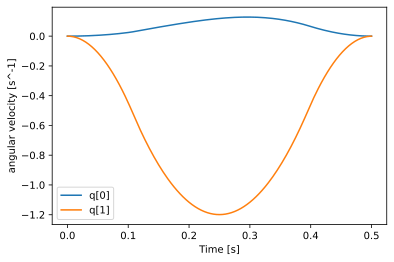

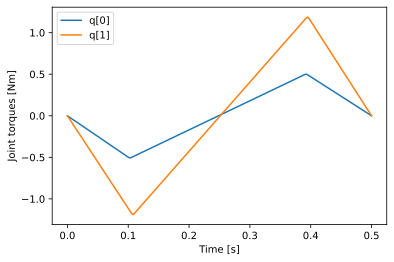

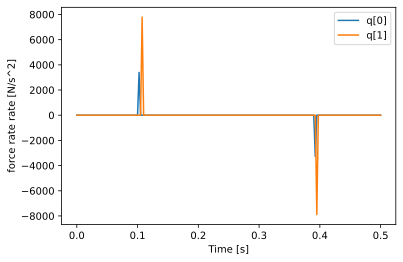

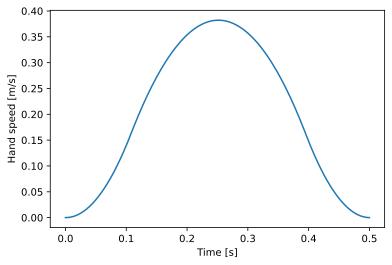

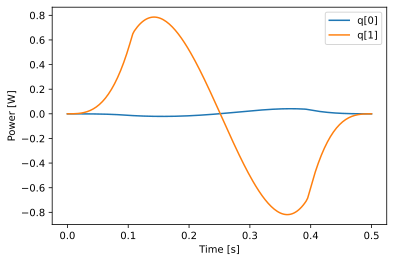

In [1]:


import matplotlib.pyplot as plt
import colour as clr
import time

import sys, os
sys.path.append(os.getcwd())
cwd = os.getcwd()
sys.path.append(cwd.rsplit('/', 1)[0])
import ReachingModels as reaching
import numpy as np
import matplotlib.pyplot as plt
import colour as clr
import time
import plotpresentlib as pp
loopValuation = [1,2,3]
color1 = clr.Color("#e0f3db")
colors = list(color1.range_to(clr.Color("#084081"),3))

sim = reaching.DoublePendulum()
%config InlineBackend.figure_formats = ['svg']

#set
tstart = time.time()
prevSol = []
dGuess = 1.0
optiLow = sim.movementTimeOptSetup(
  theTimeValuation  = 1.0, 
  theN              = 200,
  discreteOrCont='discrete',
  theDuration=.5)  

xystart = np.array([-.10,0.2])

trajNominal, optiNominal = sim.updateGuessAndSolve(optiLow, 
  xystart, 
  xystart + np.array([0,.1]), 
  theTimeValuation = 1,
  theGeneratePlots = 1,
  theFRCoef = 8.5e-3)

trajLowFR, optiLowFR = sim.updateGuessAndSolve(optiLow, 
  xystart, 
  xystart + np.array([0,.1]), 
  theTimeValuation = 1,
  theGeneratePlots = 1,
  theFRCoef = 8.5e-7)

trajHighFR, optiHighFR = sim.updateGuessAndSolve(optiLow, 
  xystart, 
  xystart + np.array([0,.1]), 
  theTimeValuation = 1,
  theGeneratePlots = 1,
  theFRCoef = 8.5e2)


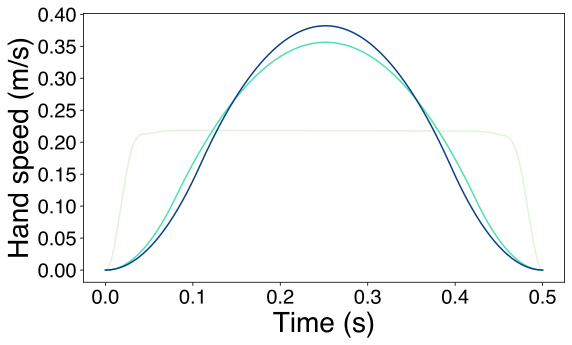

In [2]:
fig,ax = plt.subplots()

ax.plot(trajLowFR.time, trajLowFR.handspeed,color=colors[0].get_hex())
ax.plot(trajNominal.time, trajNominal.handspeed,color=colors[1].get_hex())
ax.plot(trajHighFR.time, trajHighFR.handspeed,color=colors[2].get_hex())
ax.set_xlabel("Time (s)")
ax.set_ylabel("Hand speed (m/s)")
pp.figurefyTalk(plt.gca())
plt.savefig("inspectionTime.pdf")

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    11428
Number of nonzeros in inequality constraint Jacobian.:     4423
Number of nonzeros in Lagrangian Hessian.............:     6018

Total number of variables............................:     3619
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     2028
Total number of inequality constraints...............:     2615
        inequality constraints with only lower bounds:     1006
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:     1609

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

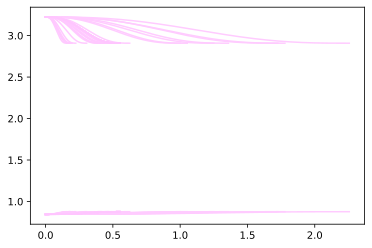

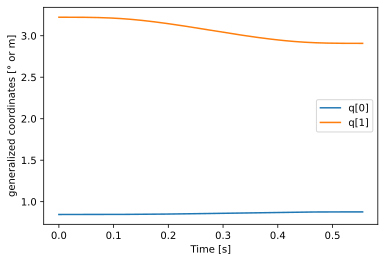

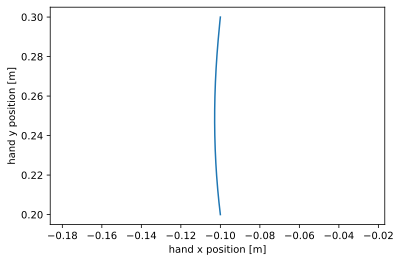

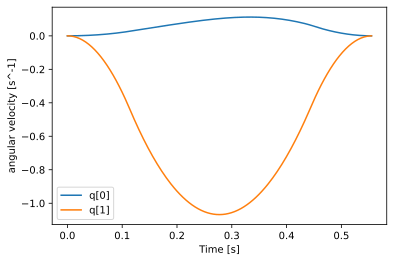

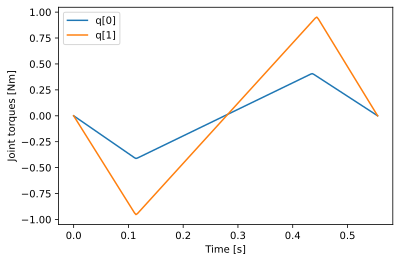

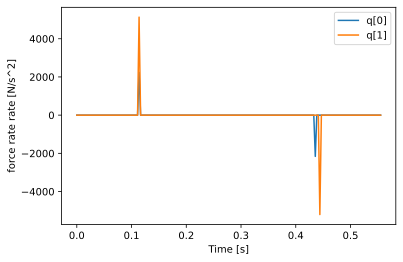

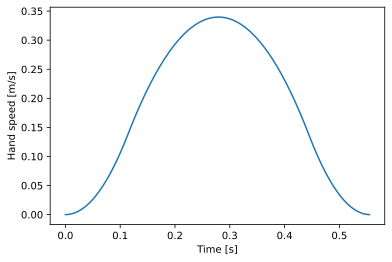

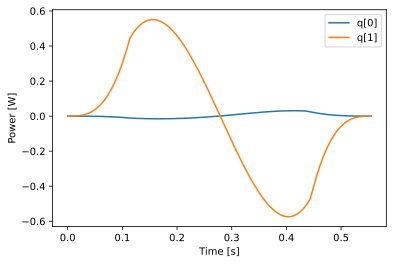

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    11428
Number of nonzeros in inequality constraint Jacobian.:     4423
Number of nonzeros in Lagrangian Hessian.............:     6018

Total number of variables............................:     3619
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     2028
Total number of inequality constraints...............:     2615
        inequality constraints with only lower bounds:     1006
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:     1609

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

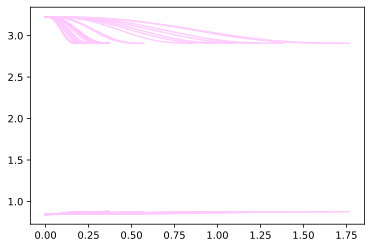

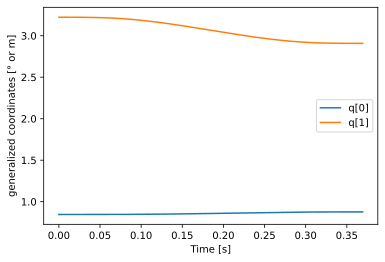

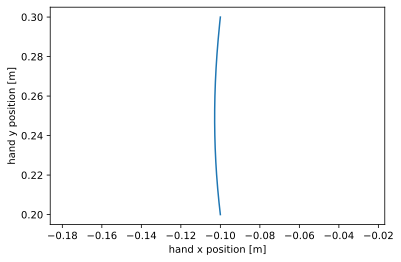

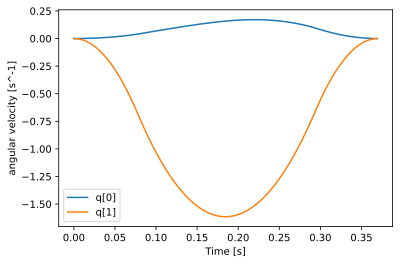

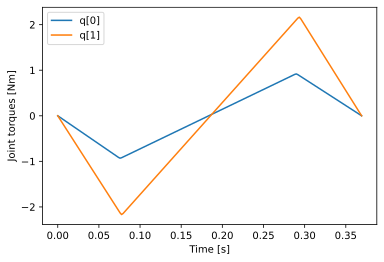

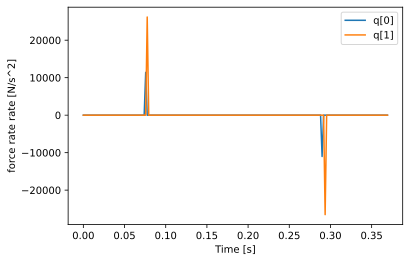

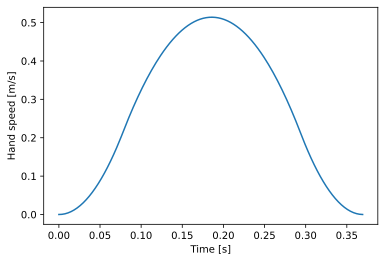

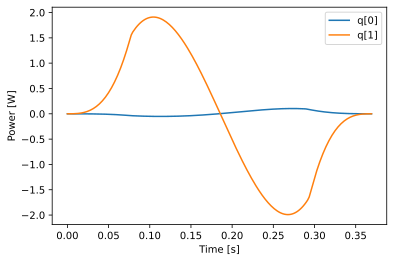

This is Ipopt version 3.12.3, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    11428
Number of nonzeros in inequality constraint Jacobian.:     4423
Number of nonzeros in Lagrangian Hessian.............:     6018

Total number of variables............................:     3619
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     2028
Total number of inequality constraints...............:     2615
        inequality constraints with only lower bounds:     1006
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:     1609

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

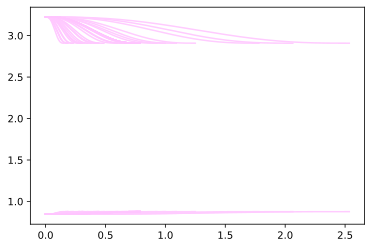

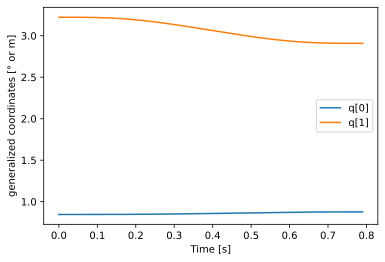

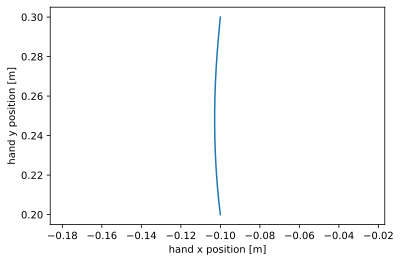

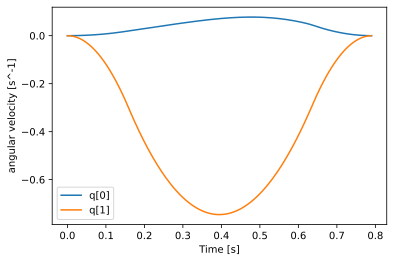

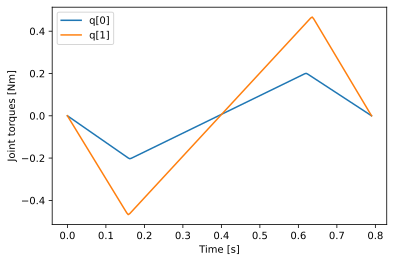

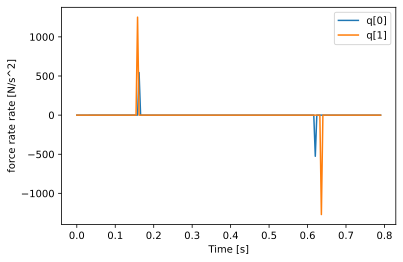

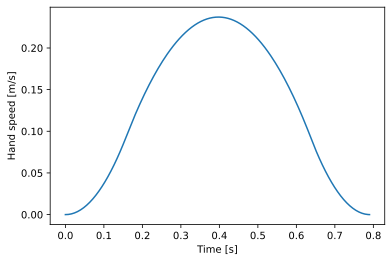

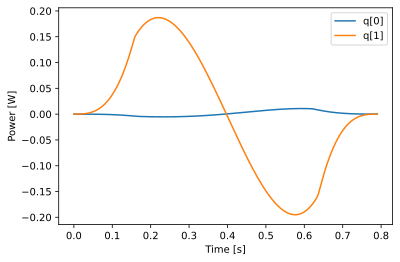

In [3]:
tstart = time.time()
prevSol = []
dGuess = 1.0
problem = sim.movementTimeOptSetup(
  theTimeValuation  = 1.0, 
  theN              = 200,
  discreteOrCont='discrete')  

trajNominalTime, optiNominalTime = sim.updateGuessAndSolve(problem, 
  xystart, 
  xystart + np.array([0,.1]), 
  theTimeValuation = 20,
  theGeneratePlots = 1,
  theFRCoef = 8.5e-2)

trajHighTime, optiHighTime = sim.updateGuessAndSolve(problem, 
  xystart, 
  xystart + np.array([0,.1]), 
  theTimeValuation = 100,
  theGeneratePlots = 1,
  theFRCoef = 8.5e-2)

trajLowTime, optiLowTime = sim.updateGuessAndSolve(problem, 
  xystart, 
  xystart + np.array([0,.1]), 
  theTimeValuation = 5,
  theGeneratePlots = 1,
  theFRCoef = 8.5e-2)


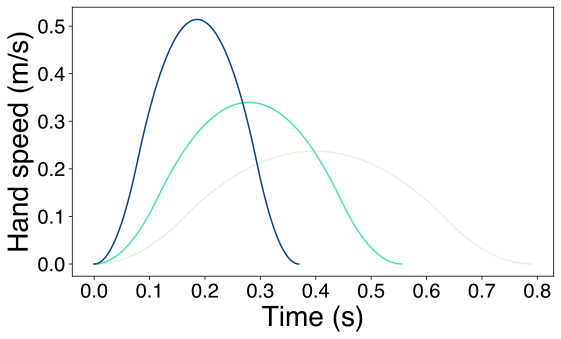

In [4]:
fig,ax = plt.subplots()

ax.plot(trajLowTime.time,     trajLowTime.handspeed,color=colors[0].get_hex())
ax.plot(trajNominalTime.time, trajNominalTime.handspeed,color=colors[1].get_hex())
ax.plot(trajHighTime.time,    trajHighTime.handspeed,color=colors[2].get_hex())
ax.set_xlabel("Time (s)")
ax.set_ylabel("Hand speed (m/s)")
pp.figurefyTalk(plt.gca())
plt.savefig("inspectionTimeValuation.pdf")